# Background    
The stock market encompasses a series of markets and exchanges wherein the buying, selling, and issuance of publicly traded company shares occur. These financial activities are conducted through institutionalized formal exchanges or over-the-counter (OTC) marketplaces, which adhere to established regulations. Within a country or region, there may exist numerous stock trading venues that facilitate transactions involving stocks and various other types of securities.    

# Problem Statement 
Misinformation and obsolete data in making analysis in the money markets across the world has been and continue to be a problem. The required information to make informed decision, at times becomes too technical for some players in the stock market industry despite the industry players craving for information to accurately make predictions. Our client, a an asset management firm, needs proper analysis on prices on Microsoft's Stock to make informed investment decisions and optimize their trading strategies as they carry out their operations as well as forecast for strategic directions and decisions.   
# Objectives 
* ```Develop a predictive model:``` To Build a robust time series model to generate accurate predictions of Microsoft's future stock prices.

* ```Improve investment decision-making:``` To Provide reliable predictions to assist investors in making informed investment decisions, optimizing portfolio allocation, and managing risk.

* ```Optimize trading strategies:``` To Enable traders to enhance their trading strategies by incorporating the predicted stock prices into their decision-making processes.

* ```Provide actionable insights:``` Extract meaningful insights from the analysis of historical stock market data and communicate them effectively to stakeholders.

* ```Enhance decision support tools:``` To create user-friendly interfaces to facilitate easy access to predictions and insights


# Data Understanding

The dataset used in this project contains Microsoft stock market information from ```01/01/2010``` through ```06/20/2023```. It is acquired from Yahoo Finance and consists of several columns that provide valuable insights into the stock's performance and trading activity. The key columns in the dataset are as follows:

* ```Date:``` This column represents the date in the format yy-mm-dd, indicating the trading day for which the stock information is recorded.

* ```Open:``` The "Open" column denotes the price of Microsoft stock at the market open, reflecting the initial trading price for the day.

* ```High:``` The "High" column indicates the highest price reached by Microsoft stock during the trading day, capturing the peak value achieved.

* ```Low:``` The "Low" column represents the lowest price reached by Microsoft stock during the trading day, providing insight into the minimum value observed.

* ```Close:``` The "Close" column signifies the final price of Microsoft stock at the market close, reflecting the last traded price of the day.

* ```Volume:``` The "Volume" column denotes the number of shares traded for Microsoft stock on a given trading day, indicating the level of market activity.

* ```Adj Close:``` The 'Adj Close' column refers to the adjusted closing price of a stock. It is a modified version of the closing price that takes into account various factors such as dividends, stock splits, and other corporate actions

By analyzing this dataset, we can gain a comprehensive understanding of Microsoft's stock market performance, including the opening and closing prices, the range of prices throughout the day (high and low), and the trading volume. These features are crucial for identifying patterns, trends, and factors that may influence the stock's price movements.

The dataset covers a significant time period, allowing for the exploration of long-term trends and capturing various market conditions. It provides a valuable resource for conducting time series analysis and developing predictive models to forecast future stock prices.

# Sucess Metrics 

* ```Prediction Sucess of the model``` : The models ability to accurately predict Microsoft's Stock prices.

In [395]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.tsa.stattools import adfuller

import pandas_datareader as web

import plotly.express as px


In [396]:
#Initialize the DataUnderstanding class
class DataUnderstanding:
    def __init__(self, df):
        self.df = df
# Get the summary statistics
    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats
#Get the count of missing values
    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values
#Get the summary of the DataFrame   
    def get_info(self):
        info = self.df.info()
        return info
# Get the data types
    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes  
# Check the count of unique values for each column (excluding the time data)
    def get_unique_values(self):
        unique_values = self.df.iloc[:, 0:6].nunique()
        return unique_values
    
# Convert the 'Date' column to a datetime data type
    def convert_to_datetime(self, column):
        self.df[column] = pd.to_datetime(self.df[column]) 

# Set the specified column as the index
    def set_index(self, column):
        self.df.set_index(column, inplace=True)

# Sort the data based on the index (date) if necessary
    def sort_data(self):
        self.df.sort_index(inplace=True)

In [397]:
# Read the data
import yfinance as yf

start = '2010-01-01'
end = '2023-06-20'

symbols = [ 'MSFT']

df = yf.download(symbols, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [398]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.572365,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.579983,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.435270,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.191557,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.351494,51197400


In [399]:
du = DataUnderstanding(df)

In [400]:
# Get info about the dataset
du.get_info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3387 entries, 2010-01-04 to 2023-06-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3387 non-null   float64
 1   High       3387 non-null   float64
 2   Low        3387 non-null   float64
 3   Close      3387 non-null   float64
 4   Adj Close  3387 non-null   float64
 5   Volume     3387 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 185.2 KB


$Inference$

* The dataset contains 1511 entries and 6 columns.


In [401]:
# checking for missing values
du.get_missing_values()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

* The dataset contains 0 null values.

In [402]:
# Check the count of unique values for each column (excluding the time data)
unique_values = du.get_unique_values()
print("Unique Values:")
print(unique_values)

Unique Values:
Open         2853
High         2813
Low          2847
Close        2836
Adj Close    3204
Volume       3378
dtype: int64


In [403]:
# Get info about the dataset
du.get_info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3387 entries, 2010-01-04 to 2023-06-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3387 non-null   float64
 1   High       3387 non-null   float64
 2   Low        3387 non-null   float64
 3   Close      3387 non-null   float64
 4   Adj Close  3387 non-null   float64
 5   Volume     3387 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 185.2 KB


In [404]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.572365,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.579983,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.435270,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.191557,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.351494,51197400


In [405]:
# Get the summary statistics
summary_stats = du.get_summary_statistics()
print("Summary Statistics:")
summary_stats

Summary Statistics:


,Open,High,Low,Close,Adj Close,Volume
count,3387.000000,3387.000000,3387.000000,3387.000000,3387.000000,3.387000e+03
mean,106.188356,107.253564,105.093965,106.230511,101.155265,3.776053e+07
std,92.825369,93.839928,91.781387,92.865755,93.717807,2.122964e+07
min,23.090000,23.320000,22.730000,23.010000,17.686445,7.425600e+06
25%,32.174999,32.495001,31.935000,32.200001,26.529748,2.384390e+07
50%,57.779999,58.000000,57.400002,57.740002,52.510899,3.200660e+07
75%,159.360001,162.065002,157.764999,160.424995,155.445099,4.630670e+07
max,351.320007,351.470001,342.200012,348.100006,348.100006,3.193179e+08


# Exlaratory Data Analysis

#### Open, Close, High and Low Prices of Microsoft Stock

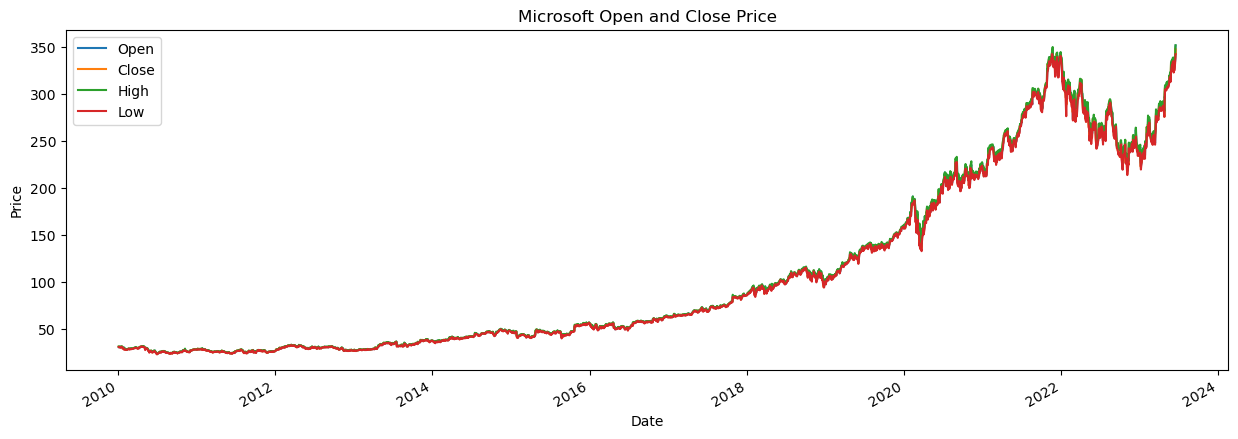

In [406]:
# plot of all year open and close price
def plot_open_close_prices(df):
    df[['Open', 'Close','High','Low']].plot(figsize=(15, 5))
    plt.title('Microsoft Open and Close Price')
    plt.ylabel('Price')
    plt.show()
plot_open_close_prices(df) 

##### Open and Close Prices

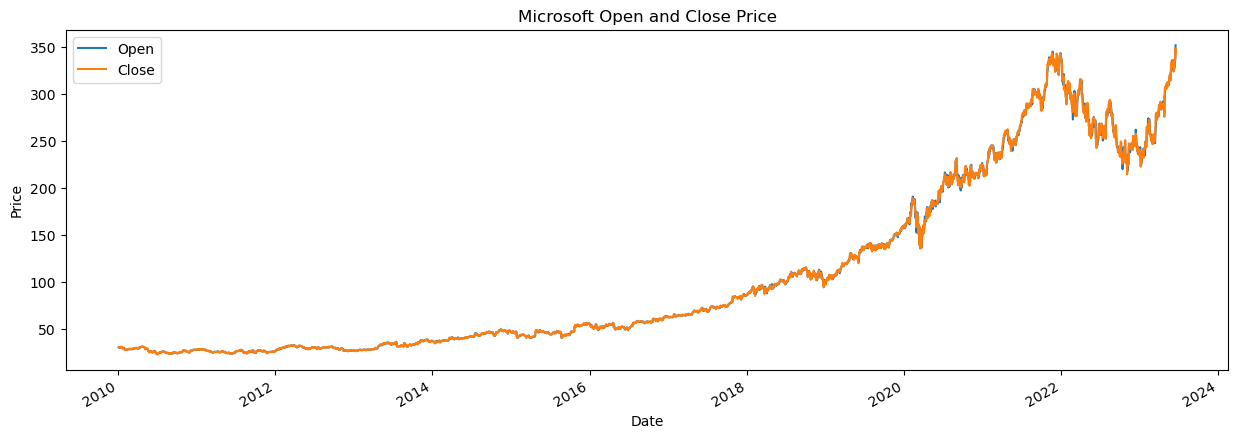

In [407]:
# plot of all year open and close price
def plot_open_close_prices(df):
    df[['Open', 'Close']].plot(figsize=(15, 5))
    plt.title('Microsoft Open and Close Price')
    plt.ylabel('Price')
    plt.show()

plot_open_close_prices(df)    

$Inference$

* The stock price of Microsoft has been increasing over the years.

#### High and Low Prices

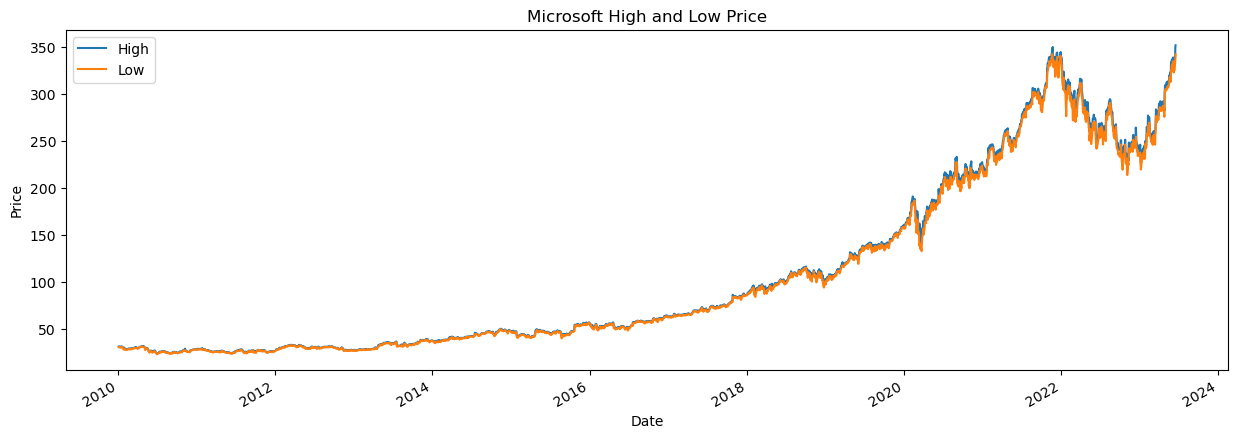

In [408]:
# plot of all year high and low price
def plot_high_low_prices(df):
    df[['High', 'Low']].plot(figsize=(15, 5))
    plt.title('Microsoft High and Low Price')
    plt.ylabel('Price')
    plt.show()
    
plot_high_low_prices(df)


#### Volume of Microsoft Stock Per Year

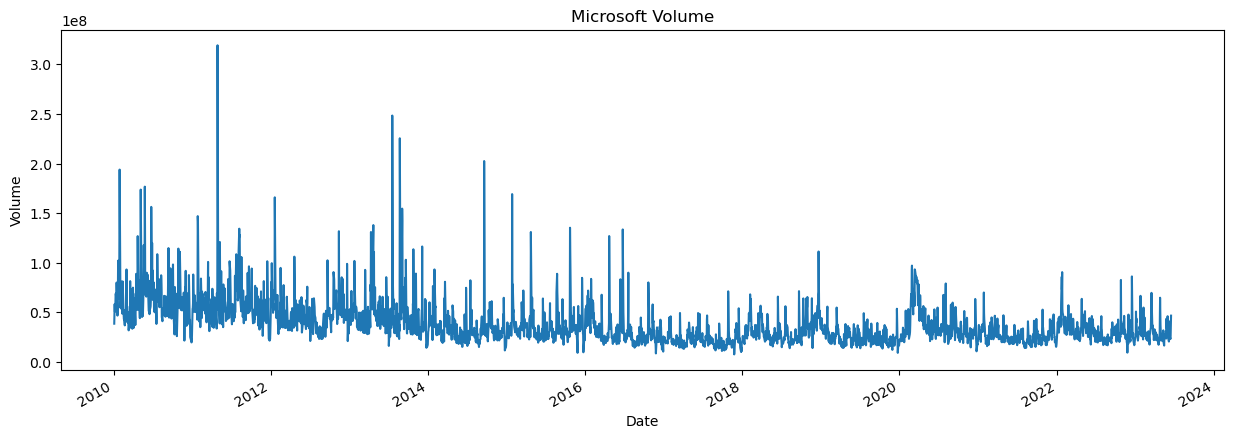

In [409]:
# plot of all year volume
def plot_volume(datasetLogDiffShifting):
    df['Volume'].plot(figsize=(15, 5))
    plt.title('Microsoft Volume')
    plt.ylabel('Volume')
    plt.show()
plot_volume(df)    

#### Distribution of Microsoft Stock Prices

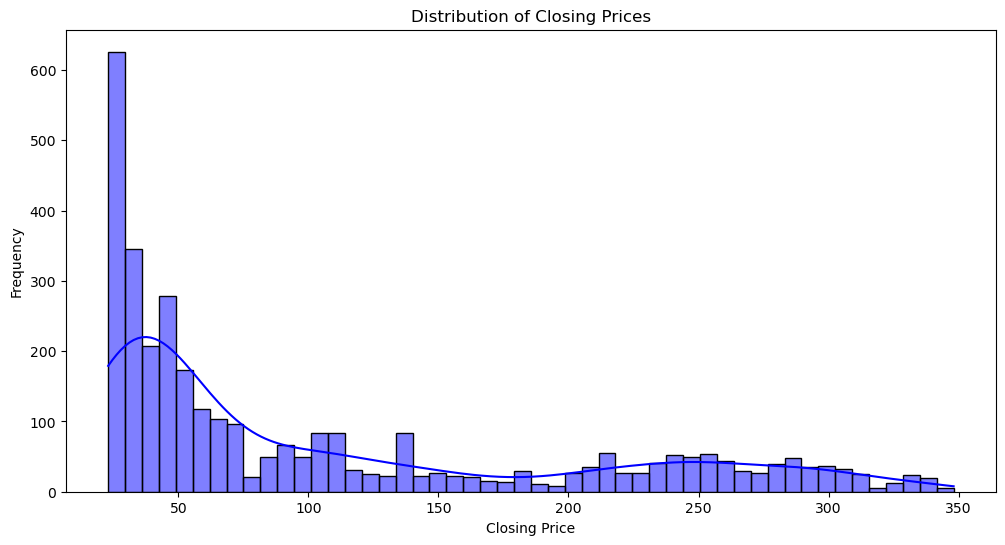

In [410]:
def plot_closing_price_distribution(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Close'], kde=True, bins=50, color='blue')
    
    plt.title('Distribution of Closing Prices')
    plt.xlabel('Closing Price')
    plt.ylabel('Frequency')
    plt.show()

plot_closing_price_distribution(df)


$Inference$
* The distribution of Microsoft stock prices is positively skewed, with a long tail on the right side.
* The prices are concentrated between 0 and 100, with a few outliers above 100.

In [411]:
weekly_analysis = df.resample('W').agg({'Close':'mean','High':'max','Low':'min','Volume':'sum'})
weekly_analysis.head()

,Close,High,Low,Volume
Date,,,,
2010-01-10,30.758,31.100000,30.190001,248098200
2010-01-17,30.502,31.240000,29.910000,329671600
2010-01-24,30.165,31.240000,28.840000,276516500
2010-01-31,29.166,29.920000,27.660000,505364600
2010-02-07,28.272,28.790001,27.570000,360552800


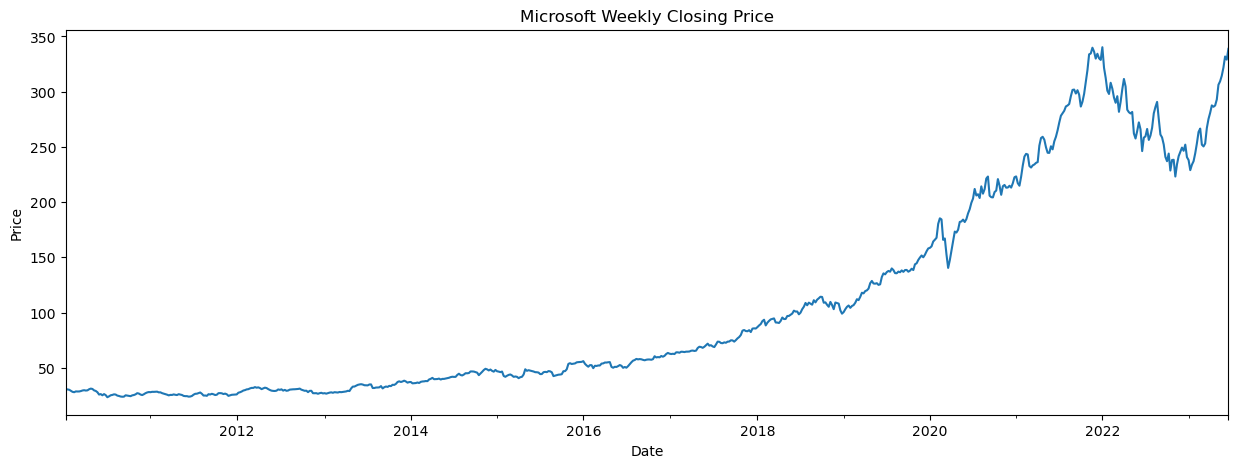

In [412]:
# plot of weekly closing price Downsampled to weekly frequency

def plot_weekly_closing_price(weekly_analysis):
    weekly_analysis['Close'].plot(figsize=(15, 5))
    plt.title('Microsoft Weekly Closing Price')
    plt.ylabel('Price')
    plt.show()

plot_weekly_closing_price(weekly_analysis)

#### Daily Price Change 

In [413]:
# Calculate Daily Returns

df['Price_change'] = df['Close'] - df['Open']

# 1 Day Percent Change
df['Percent_return'] = ((df['Price_change']) / df['Close']) * 100

df.head()


,Open,High,Low,Close,Adj Close,Volume,Price_change,Percent_return
Date,,,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.572365,38409100,0.330000,1.066236
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.579983,49749600,0.109999,0.355293
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.435270,58182400,-0.109999,-0.357487
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.191557,50559700,-0.179998,-0.591128
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.351494,51197400,0.379999,1.239397


In [416]:
df['Price_change'] = df['Close'] - df['Open']
df.head()      
df['percent_return'] = ((df['Price_change']) / df['Close']) * 100       
fig = px.line(df, x=df.index, y="percent_return", title='Percent Return')
fig.show()

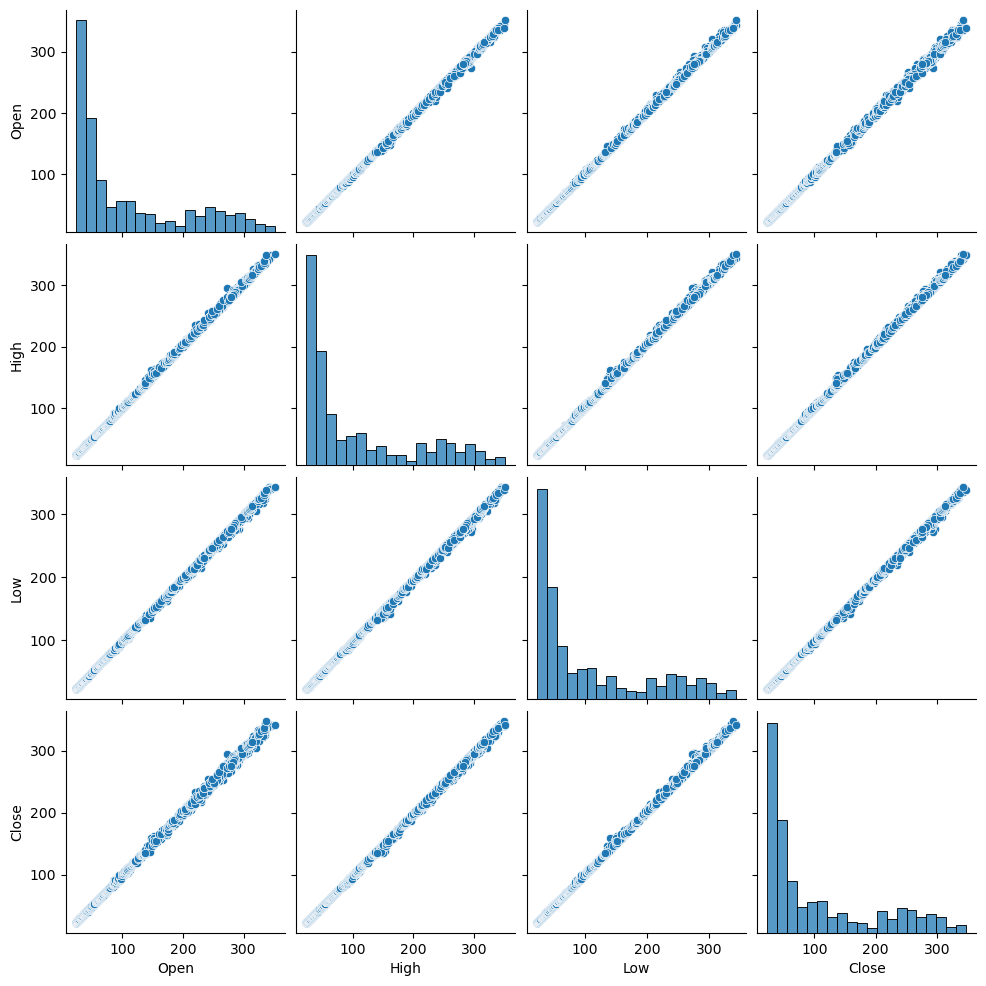

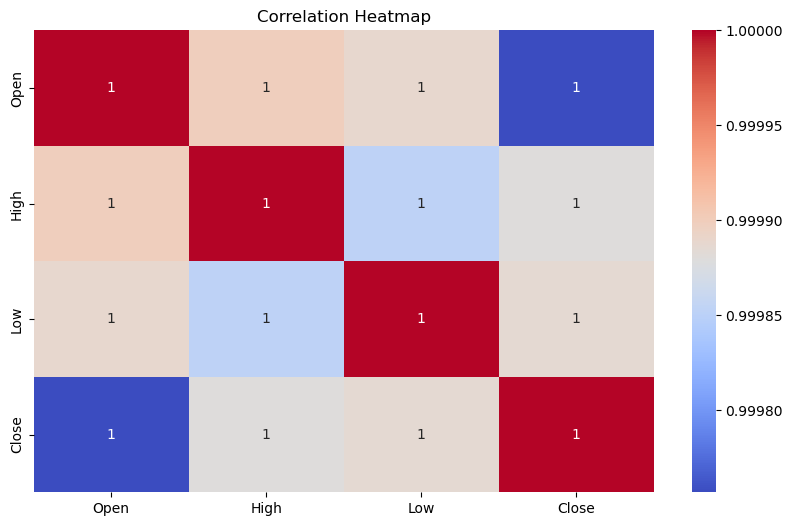

In [ ]:
def plot_pairplot(df, columns):
    sns.pairplot(df[columns])
    plt.show()

def plot_correlation_heatmap(df, columns):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Specify the columns for pair plot and correlation heatmap
columns_for_pairplot = ['Open', 'High', 'Low', 'Close']
columns_for_heatmap = ['Open', 'High', 'Low', 'Close']

# Call the functions to generate the visualizations
plot_pairplot(df, columns_for_pairplot)
plot_correlation_heatmap(df, columns_for_heatmap)    


# Checking for Stationarity 

In [ ]:
# Checking for Stationarity

rolmean = df['Close'].rolling(window=12).mean()
rolstd = df['Close'].rolling(window=12).std()

print(rolmean, rolstd)

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2023-06-12    330.274170
2023-06-13    330.971670
2023-06-14    331.342501
2023-06-15    332.750003
2023-06-16    333.911667
Name: Close, Length: 3387, dtype: float64 Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2023-06-12    4.186702
2023-06-13    4.091493
2023-06-14    4.465716
2023-06-15    6.580912
2023-06-16    6.960705
Name: Close, Length: 3387, dtype: float64


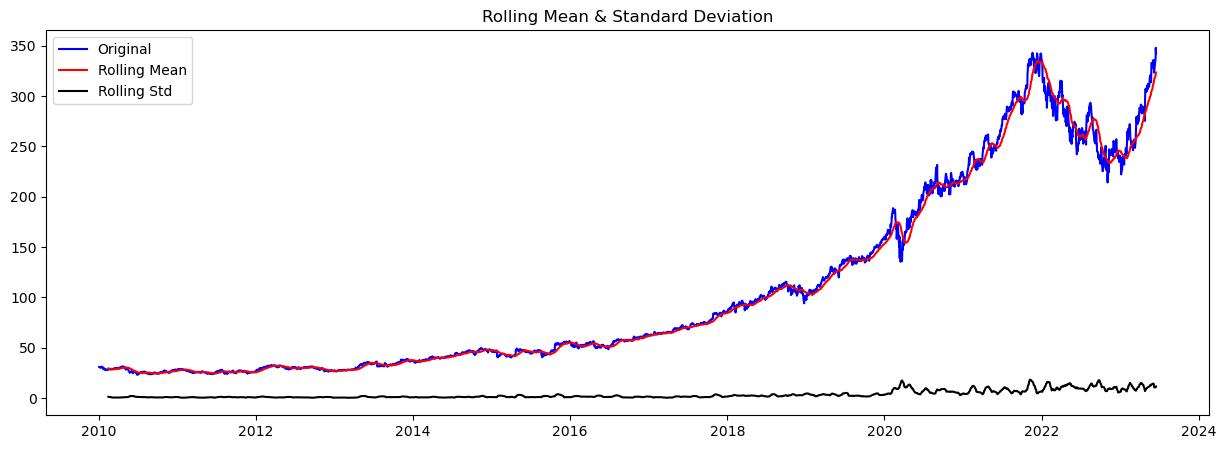

In [ ]:
# Plot rolling statistics:
def plot_rolling_statistics(df, window):
    plt.figure(figsize=(15, 5))
    orig = plt.plot(df['Close'], color='blue', label='Original')
    rolmean = df['Close'].rolling(window=window).mean()
    rolstd = df['Close'].rolling(window=window).std()
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

# Define the window size for rolling calculations
window_size = 30

# Call the function to plot rolling statistics
plot_rolling_statistics(df, window_size)

In [ ]:
# Perform Dickey-Fuller test:

print('Results of Dickey-Fuller Test:')

dftest = adfuller(df['Close'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                    1.740475
p-value                           0.998223
#Lags Used                       26.000000
Number of Observations Used    3360.000000
Critical Value (1%)              -3.432298
Critical Value (5%)              -2.862401
Critical Value (10%)             -2.567228
dtype: float64


### Log Transformation of the Target Variable $Close$

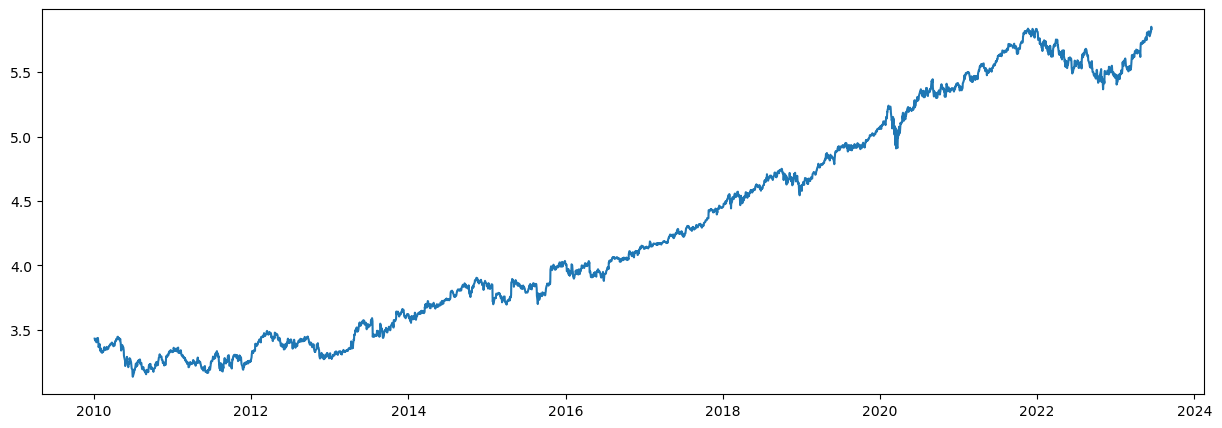

In [ ]:
# Plot the log scale of the closing price   
plt.figure(figsize=(15, 5))

df_logScale = np.log(df['Close'])
plt.plot(df_logScale)

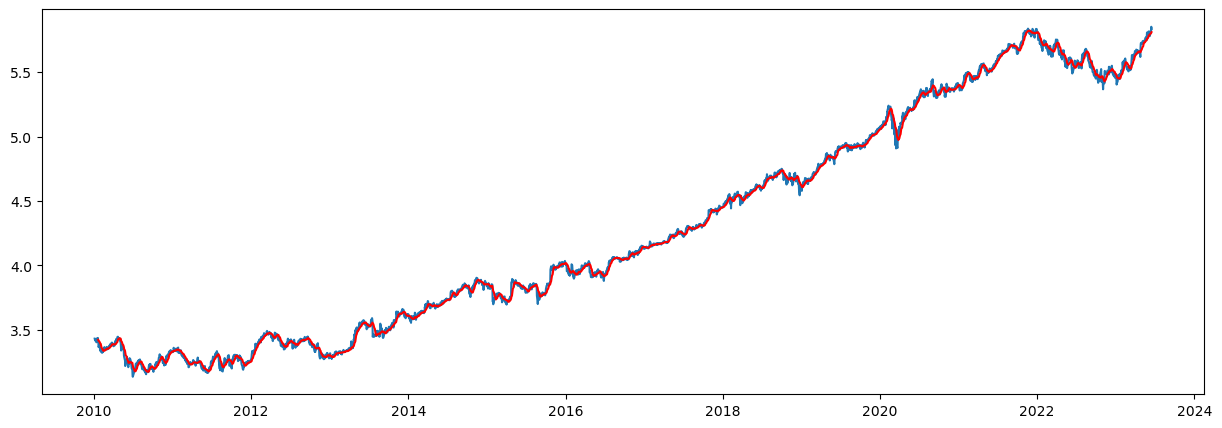

In [ ]:
movingAverage = df_logScale.rolling(window=12).mean()
movingSTD = df_logScale.rolling(window=12).std()
plt.figure(figsize=(15, 5))
plt.plot(df_logScale)
plt.plot(movingAverage, color='red')
plt.show()

### Difference of the Log Transformed Target Variable $Close$

In [ ]:
# Get the difference between the moving average and the actual closing price
datasetLogScaleMinusMovingAverage = df_logScale - movingAverage
datasetLogScaleMinusMovingAverage

# Remove the NaN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage

Date
2010-01-20   -0.002425
2010-01-21   -0.018997
2010-01-22   -0.049047
2010-01-25   -0.032670
2010-01-26   -0.023908
                ...   
2023-06-12    0.004834
2023-06-13    0.010047
2023-06-14    0.018022
2023-06-15    0.045276
2023-06-16    0.025097
Name: Close, Length: 3376, dtype: float64

In [ ]:
# Checking for Stationarity

def test_stationarity(timeseries):
        #Determing rolling statistics
        movingAverage = timeseries.rolling(window=12).mean()
        movingSTD = timeseries.rolling(window=12).std()
    
        #Plot rolling statistics:
        plt.figure(figsize=(15, 5))
        orig = plt.plot(timeseries, color='blue', label='Original')
        mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
        std = plt.plot(movingSTD, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)
        
        #Perform Dickey-Fuller test:
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
        for key, value in dftest[4].items():
            dfoutput['Critical Value (%s)' %key] = value
        print(dfoutput)

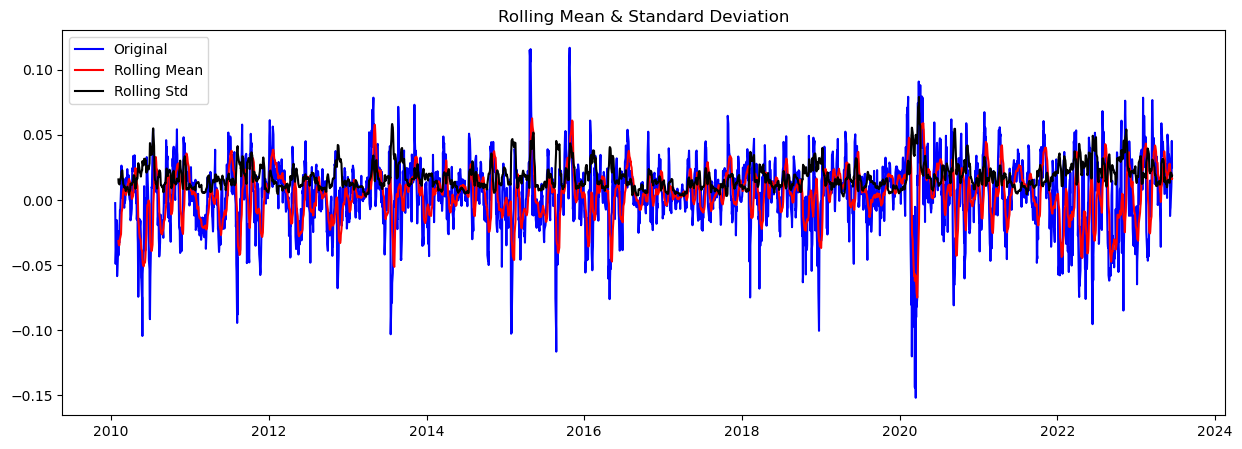

Results of Dickey-Fuller Test:
Test Statistic                -1.347539e+01
p-value                        3.319963e-25
#Lags Used                     1.400000e+01
Number of Observations Used    3.361000e+03
Critical Value (1%)           -3.432297e+00
Critical Value (5%)           -2.862400e+00
Critical Value (10%)          -2.567228e+00
dtype: float64


In [ ]:
# Test the stationarity of the data
test_stationarity(datasetLogScaleMinusMovingAverage)

$Inference$
* The test statistic is a measure of how strongly the data rejects the null hypothesis of non-stationarity. In this case, the test statistic is ```-13.47539```, which is significantly lower than the critical values at all confidence levels ```(1%, 5%, and 10%)```. This suggests strong evidence against the null hypothesis of non-stationarity, indicating that the time series is likely stationary.

* The p-value is the probability of observing the test statistic or a more extreme value under the null hypothesis. In this case, the p-value is very small ```(3.319963e-25)```, which is significantly below common significance levels like ```0.05``` or ```0.01```. This further supports the rejection of the null hypothesis and indicates that the time series is stationary.

* The number of lags used is ```14```, which represents the number of lagged differences included in the regression. This value is determined automatically by the test based on maximizing certain criteria.

* The number of observations used is ```3361```, indicating the total number of data points used in the analysis.

* The critical values represent the threshold values at which the test statistic must be below in order to reject the null hypothesis. The critical values at different confidence levels ```(1%, 5%, and 10%)``` are compared to the test statistic. If the test statistic is lower than these critical values, the null hypothesis is rejected.

Based on these results, it appears that the time series you tested is ```stationary```, as both the test statistic and the p-value provide strong evidence against the null hypothesis of non-stationarity.

### Exponential Smoothing

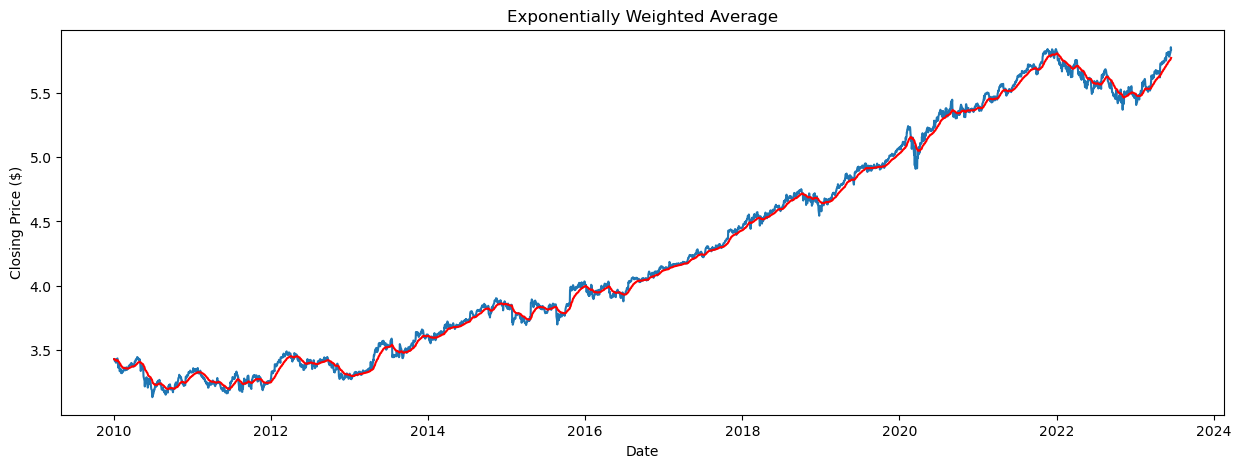

In [ ]:
# Get the exponentially weighted moving average
plt.figure(figsize=(15, 5))

exponentialDecayWeightedAverage = df_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

plt.title('Exponentially Weighted Average')
plt.ylabel('Closing Price ($)')
plt.xlabel('Date') 

plt.show()

### Differencing

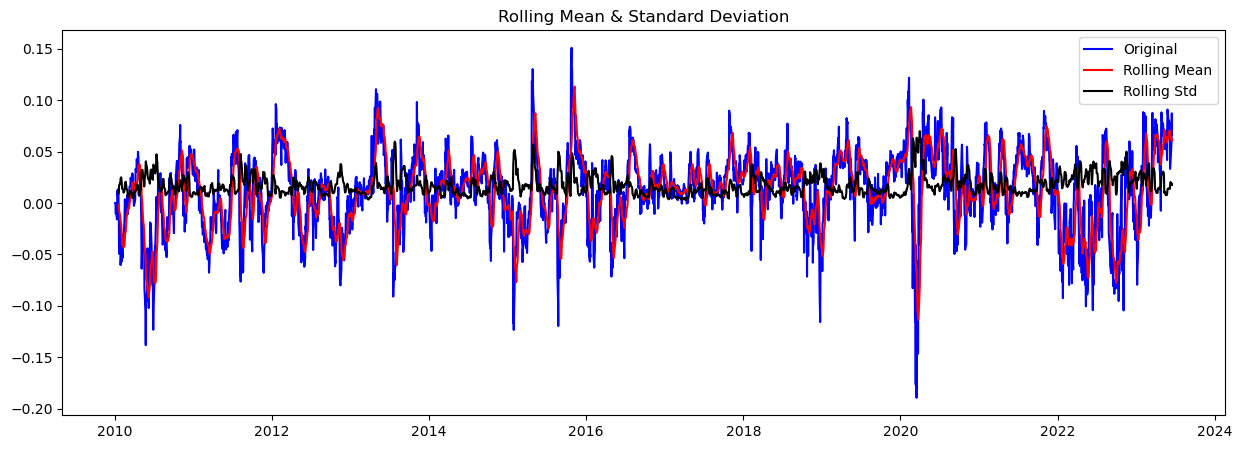

Results of Dickey-Fuller Test:
Test Statistic                -9.416397e+00
p-value                        5.654121e-16
#Lags Used                     9.000000e+00
Number of Observations Used    3.377000e+03
Critical Value (1%)           -3.432288e+00
Critical Value (5%)           -2.862396e+00
Critical Value (10%)          -2.567226e+00
dtype: float64


In [ ]:
# Getting the difference between the exponentially weighted moving average and the actual closing price
datasetLogScaleMinusMovingExponentialDecayAverage = df_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

$Inference$

* The test statistic is -9.416397e+00. It is a measure of how strongly the data rejects the null hypothesis of non-stationarity. In this case, the test statistic is significantly lower than the critical values at all confidence levels (1%, 5%, and 10%). This suggests strong evidence against the null hypothesis of non-stationarity, indicating that the time series is likely stationary.

* The p-value is 5.654121e-16, which is very small. The p-value represents the probability of observing the test statistic or a more extreme value under the null hypothesis. A small p-value suggests strong evidence against the null hypothesis, supporting the conclusion that the time series is stationary.

* The number of lags used is 9, indicating the number of lagged differences included in the regression. This value is determined automatically by the test based on certain criteria.

* The number of observations used is 3,377, representing the total number of data points used in the analysis.

* The critical values represent threshold values at which the test statistic must be below to reject the null hypothesis. The critical values at different confidence levels (1%, 5%, and 10%) are compared to the test statistic. If the test statistic is lower than these critical values, the null hypothesis is rejected.

* Based on these results, it appears that the time series you tested is stationary. Both the test statistic and the p-value provide strong evidence against the null hypothesis of non-stationarity, supporting the conclusion of stationarity.

### Shifting 

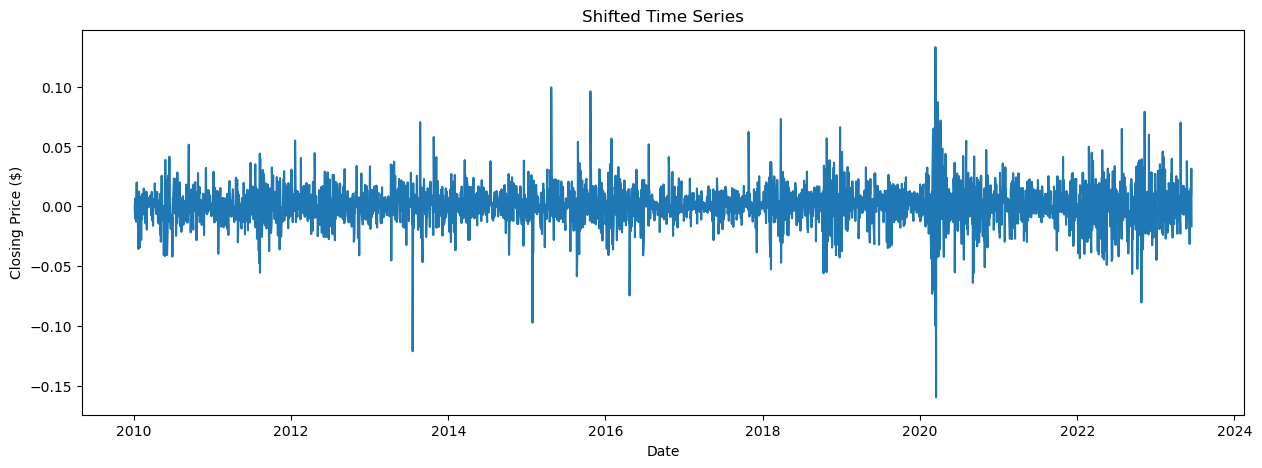

In [ ]:
# Shift the data by 1 to make it stationary
plt.figure(figsize=(15, 5))

datasetLogDiffShifting = df_logScale - df_logScale.shift()

plt.plot(datasetLogDiffShifting)
plt.ylabel('Closing Price ($)')
plt.xlabel('Date')
plt.title('Shifted Time Series')

plt.show()

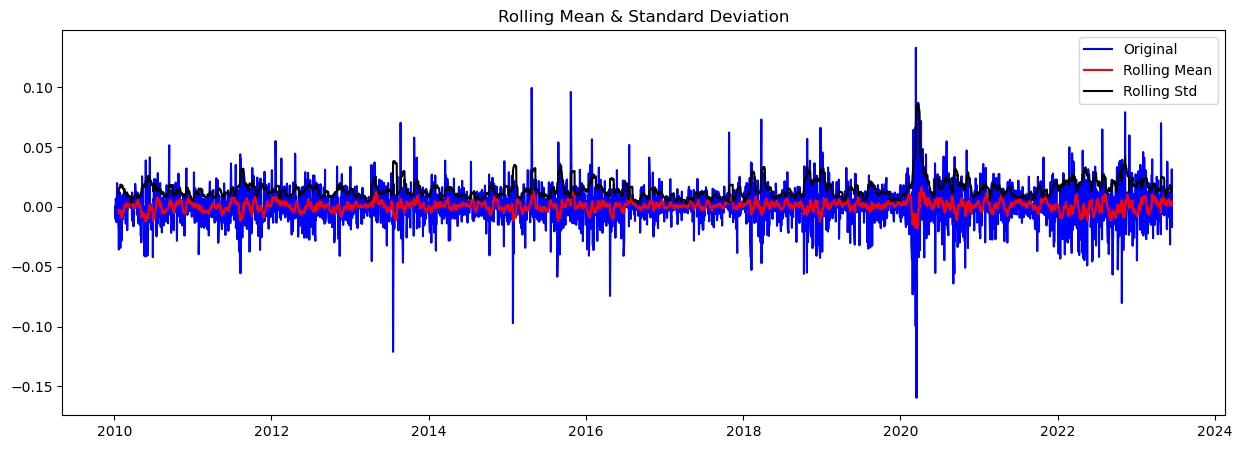

Results of Dickey-Fuller Test:
Test Statistic                  -20.709984
p-value                           0.000000
#Lags Used                        8.000000
Number of Observations Used    3377.000000
Critical Value (1%)              -3.432288
Critical Value (5%)              -2.862396
Critical Value (10%)             -2.567226
dtype: float64


In [ ]:
# Removing the NaN values
datasetLogDiffShifting.dropna(inplace=True)

# Test the stationarity of the data
test_stationarity(datasetLogDiffShifting)

$Inference$

* The test statistic is ```-20.709984```. It is a measure of how strongly the data rejects the null hypothesis of non-stationarity. In this case, the test statistic is significantly lower than the critical values at all confidence levels ```(1%, 5%, and 10%)```. This suggests strong evidence against the null hypothesis of non-stationarity, indicating that the time series is likely stationary.

* The p-value is ```0.000000```, which is very small. The p-value represents the probability of observing the test statistic or a more extreme value under the null hypothesis. A small p-value suggests strong evidence against the null hypothesis, supporting the conclusion that the time series is stationary.

* The number of lags used is ```8```, indicating the number of lagged differences included in the regression. This value is determined automatically by the test based on certain criteria.

* The number of observations used is ```3,377```, representing the total number of data points used in the analysis.

* The critical values represent threshold values at which the test statistic must be below to reject the null hypothesis. The critical values at different confidence levels ```(1%, 5%, and 10%)``` are compared to the test statistic. If the test statistic is lower than these critical values, the null hypothesis is rejected.

* Based on these results, it is evident that the time series you tested is stationary. Both the test statistic and the p-value provide strong evidence against the null hypothesis of non-stationarity, supporting the conclusion of stationarity.

### Data Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose 

decomposition = seasonal_decompose(df_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15, 5))

plt.subplot(411)
plt.plot(df_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None